In [1]:

import numpy as np

def apply_mask_sdss(cat_sdss, zmin, zmax):

  mask  = (cat_sdss["red"] > zmin)*(cat_sdss["red"] < zmax)
  mask *= (cat_sdss["ra"]>=100.)*(cat_sdss["ra"]<=275.0) # corta los bigotes
  mask *= ~((cat_sdss["ra"]>250.)*(cat_sdss["ra"]<270.0)*(cat_sdss["dec"]>50.0)*(cat_sdss["dec"]<70.0))   # corta una esquina
  mask *= ~((cat_sdss["ra"]>100.0)*(cat_sdss["ra"]<120.0)*(cat_sdss["dec"]>60.0)*(cat_sdss["dec"]<70.0))  # corta una esquina
  mask *= ~((cat_sdss["ra"]>256.6)*(cat_sdss["ra"]<270.0)*(cat_sdss["dec"]>39.2)*(cat_sdss["dec"]<70.0))  # corta una esquina
  mask *= ~((cat_sdss["ra"]>100.0)*(cat_sdss["ra"]<128.0)*(cat_sdss["dec"]>0.0)*(cat_sdss["dec"]<1.5))    # corta una esquina
  mask *= ~((cat_sdss["ra"]>263.0)*(cat_sdss["ra"]<270.0)*(cat_sdss["dec"]>23.0)*(cat_sdss["dec"]<40.0))  # corta una esquina
  mask *= ~((cat_sdss["ra"]>261.4)*(cat_sdss["ra"]<263.0)*(cat_sdss["dec"]>31.7)*(cat_sdss["dec"]<35.0))  # corta una esquina
  mask *= ~((cat_sdss["ra"]>252.5)*(cat_sdss["ra"]<255.0)*(cat_sdss["dec"]>13.0)*(cat_sdss["dec"]<14.5))  # corta una esquina
  mask *= ~((cat_sdss["ra"]>112.0)*(cat_sdss["ra"]<114.0)*(cat_sdss["dec"]>14.0)*(cat_sdss["dec"]<22.0))  # corta una esquina
  mask *= ~((cat_sdss["ra"]>114.0)*(cat_sdss["ra"]<115.5)*(cat_sdss["dec"]>14.0)*(cat_sdss["dec"]<19.4))  # corta una esquina
  mask *= ~((cat_sdss["ra"]>119.0)*(cat_sdss["ra"]<120.0)*(cat_sdss["dec"]>6.0)*(cat_sdss["dec"]<7.5))    # corta una esquina
  mask *= ~((cat_sdss["ra"]>100.0)*(cat_sdss["ra"]<110.0)*(cat_sdss["dec"]>35.0)*(cat_sdss["dec"]<40.1))  # corta una esquina
  mask *= ~((cat_sdss["ra"]>110.0)*(cat_sdss["ra"]<119.0)*(cat_sdss["dec"]>6.0)*(cat_sdss["dec"]<10.6))   # corta una esquina
  mask *= ~((cat_sdss["ra"]>110.0)*(cat_sdss["ra"]<112.5)*(cat_sdss["dec"]>30.0)*(cat_sdss["dec"]<36.5))  # corta una esquina
  mask *= ~((cat_sdss["ra"]>112.9)*(cat_sdss["ra"]<113.3)*(cat_sdss["dec"]>35.0)*(cat_sdss["dec"]<35.8))  # corta una esquina
  mask *= ~((cat_sdss["ra"]>114.2)*(cat_sdss["ra"]<114.3)*(cat_sdss["dec"]>35.06)*(cat_sdss["dec"]<36.2)) # corta una esquina

  return cat_sdss[mask]



In [8]:
import pandas as pd

# Read the CSV file into a DataFrame
cat_sdss = pd.read_csv('../data/sdss_zmin_0.000_zmax_0.300_sigma_5.0.csv')
len(cat_sdss)

508890

In [3]:
cat_sdss.keys()

Index(['plate', 'mjd', 'fiberID', 'objid', 'ra', 'dec', 'red', 'mag_ap_g',
       'mag_ap_r', 'x', 'y', 'z', 'mag_abs_g', 'mag_abs_r', 'lum_g', 'lum_r',
       'idfil', 'idseg', 'long_fil', 'long_seg', 'lum_r_fil', 'lum_r_seg',
       'dist_fil'],
      dtype='object')

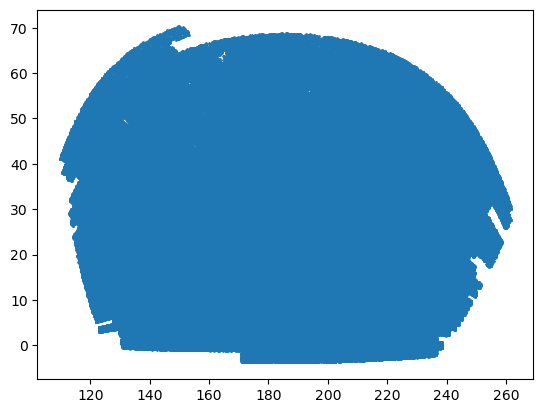

In [4]:
import matplotlib.pyplot as plt

#plt.hist2d(cat_sdss['ra'], cat_sdss['dec'],bins=50)
plt.scatter(cat_sdss['ra'], cat_sdss['dec'],color='C00',s=1)
plt.show()


In [9]:

sdss_mask = apply_mask_sdss(cat_sdss=cat_sdss,zmin=0.,zmax=0.15)
len(sdss_mask)

411476

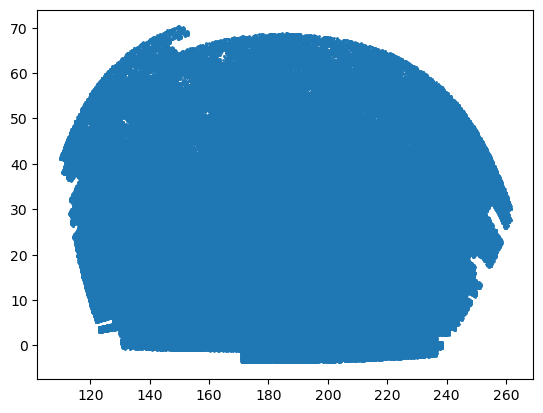

In [6]:
import matplotlib.pyplot as plt

plt.scatter(sdss_mask['ra'], sdss_mask['dec'], c='C00', s=1)
plt.show()

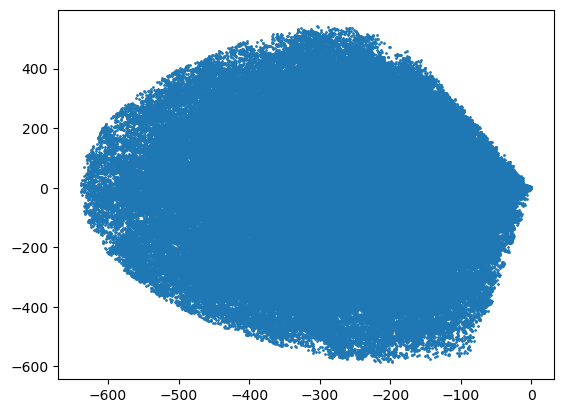

In [7]:
import matplotlib.pyplot as plt

plt.scatter(sdss_mask['x'], sdss_mask['y'], c='C00', s=1)
plt.show()

### Ver galaxias en filamentos y elsewhere

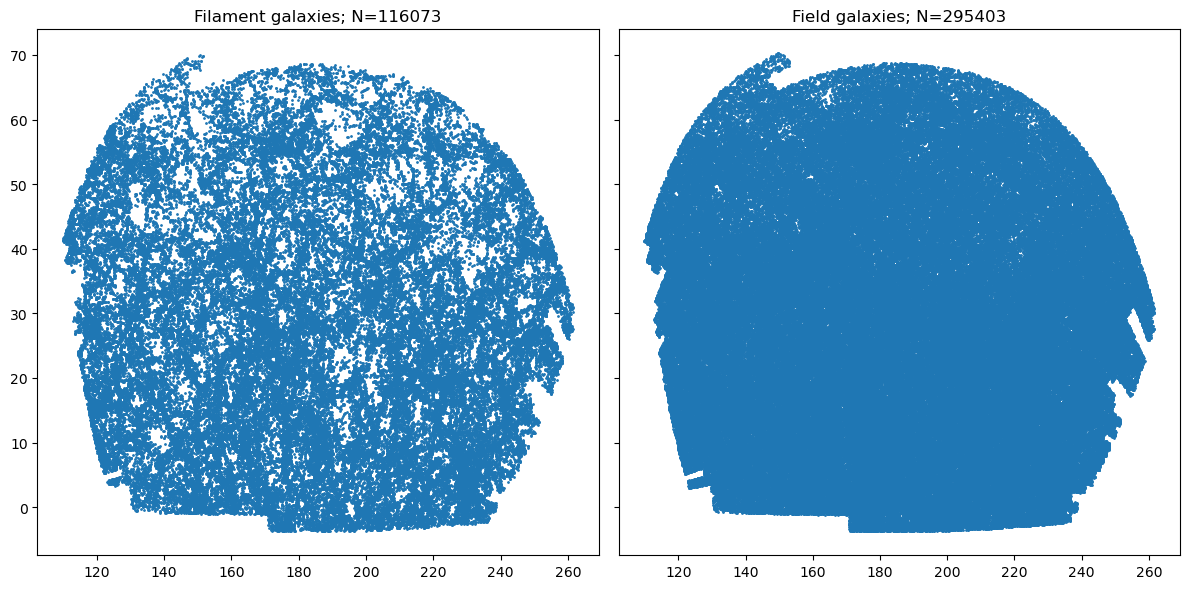

In [14]:
import matplotlib.pyplot as plt

filgxs = sdss_mask[sdss_mask['dist_fil']<3.]

nonfilgxs = sdss_mask[sdss_mask['dist_fil']>3.]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)  # 1 row, 2 columns

axes[0].scatter(filgxs['ra'], filgxs['dec'], c='C00', s=1)
axes[1].scatter(nonfilgxs['ra'], nonfilgxs['dec'], c='C00', s=1)

axes[0].set_title(f'Filament galaxies; N={len(filgxs)}')
axes[1].set_title(f'Field galaxies; N={len(nonfilgxs)}')

plt.tight_layout()
plt.show()